# **Load & Visualize Time Series**

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('jena_climate_2009_2016.csv')
print(df.head())



             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [16]:

df = df[['T (degC)', 'p (mbar)', 'rh (%)']].dropna()


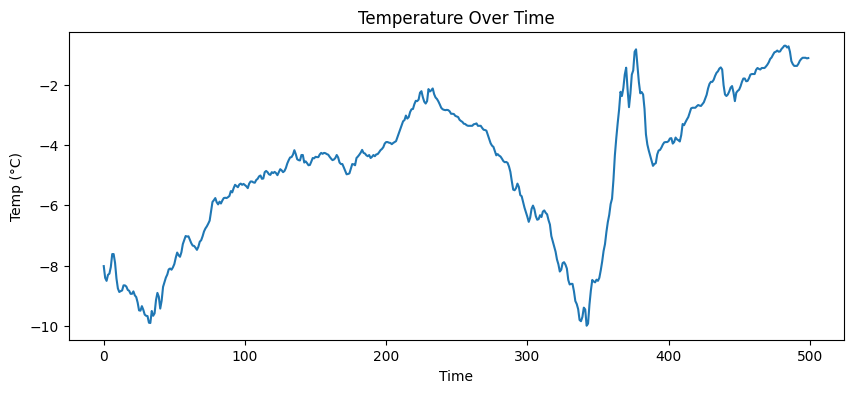

In [17]:
# Plot a sample column
plt.figure(figsize=(10, 4))
plt.plot(df["T (degC)"][:500])
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temp (°C)")
plt.show()

# **Normalize & Create Sequences**

In [18]:
scaler = StandardScaler()
data = scaler.fit_transform(df.values)

In [19]:

# ### Create multivariate sequences
def create_sequences(data, window=24):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window][0])  # Predict temp
    return np.array(X), np.array(y)

X, y = create_sequences(data)
print("Sequence shape:", X.shape)

Sequence shape: (420527, 24, 3)


# Split

In [20]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM model

In [21]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,473 (68.25 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

#  Train Model

In [22]:

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=64)

Epoch 1/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 104s 19ms/step - loss: 0.0234 - val_loss: 7.2570e-04
Epoch 2/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 138s 19ms/step - loss: 6.8398e-04 - val_loss: 7.0261e-04
Epoch 3/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 143s 19ms/step - loss: 6.2366e-04 - val_loss: 6.0321e-04
Epoch 4/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 140s 18ms/step - loss: 6.0357e-04 - val_loss: 6.1799e-04
Epoch 5/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 97s 18ms/step - loss: 5.9435e-04 - val_loss: 5.8832e-04
Epoch 6/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 142s 18ms/step - loss: 5.8911e-04 - val_loss: 6.1038e-04
Epoch 7/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 139s 18ms/step - loss: 5.7453e-04 - val_loss: 6.6374e-04
Epoch 8/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 146s 19ms/step - loss: 5.6684e-04 - val_loss: 5.8203e-04
Epoch 9/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 137s 18ms/step - loss: 5.6049e-04 - val_loss: 6.5545e-04
Epoch 10/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 144s 18ms/step - loss: 5.5844e-04 - val_loss: 5.9218e-04


#  Evaluate and Plot Predictions

2629/2629 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 6.8137e-04

Test Mean Squared Error: 0.0006


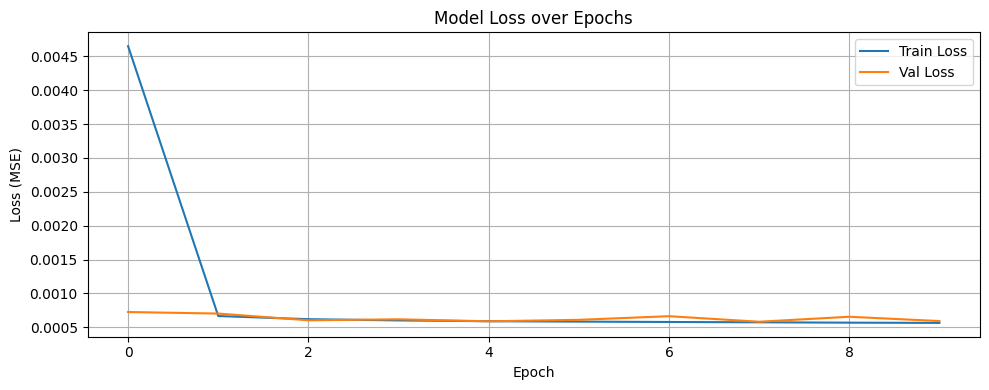

In [23]:

mse = model.evaluate(X_test, y_test)
print(f"\nTest Mean Squared Error: {mse:.4f}")

# ### Plot training history
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#  Save the Final Model

In [24]:

model.save("final_lstm_jena_model.h5")